In [18]:
import os
import re
import pandas as pd

In [20]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 500)

In [22]:
df = pd.read_parquet(os.path.join("data/cnb_sloupce","008.parquet"))
len(df)

1238228

In [24]:
df = df.explode('008')
len(df)

1238228

In [26]:
def najdi_rok(nn8):
    try:
        if nn8[6] in ['s', 't', 'd', 'm', 'e', 'c','u', 'r']:
            try:
                return int(nn8[7:11])
            except Exception as e:
                return None
            else:
                return None
        elif nn8[6] == 'q':
            try:
                rok1 = int(nn8[7:11])
                rok2 = int(nn8[11:15])
                if (len(str(rok2)) == 4) & (rok2 - rok1 <= 5):
                    return int(statistics.median([rok1, rok2]))
                else:
                    return None
            except:
                return None
        else:
            return None
    except Exception as E:
        print("nn8")

In [28]:
df['rok'] = df['008'].apply(lambda x: najdi_rok(x))

<Axes: xlabel='rok'>

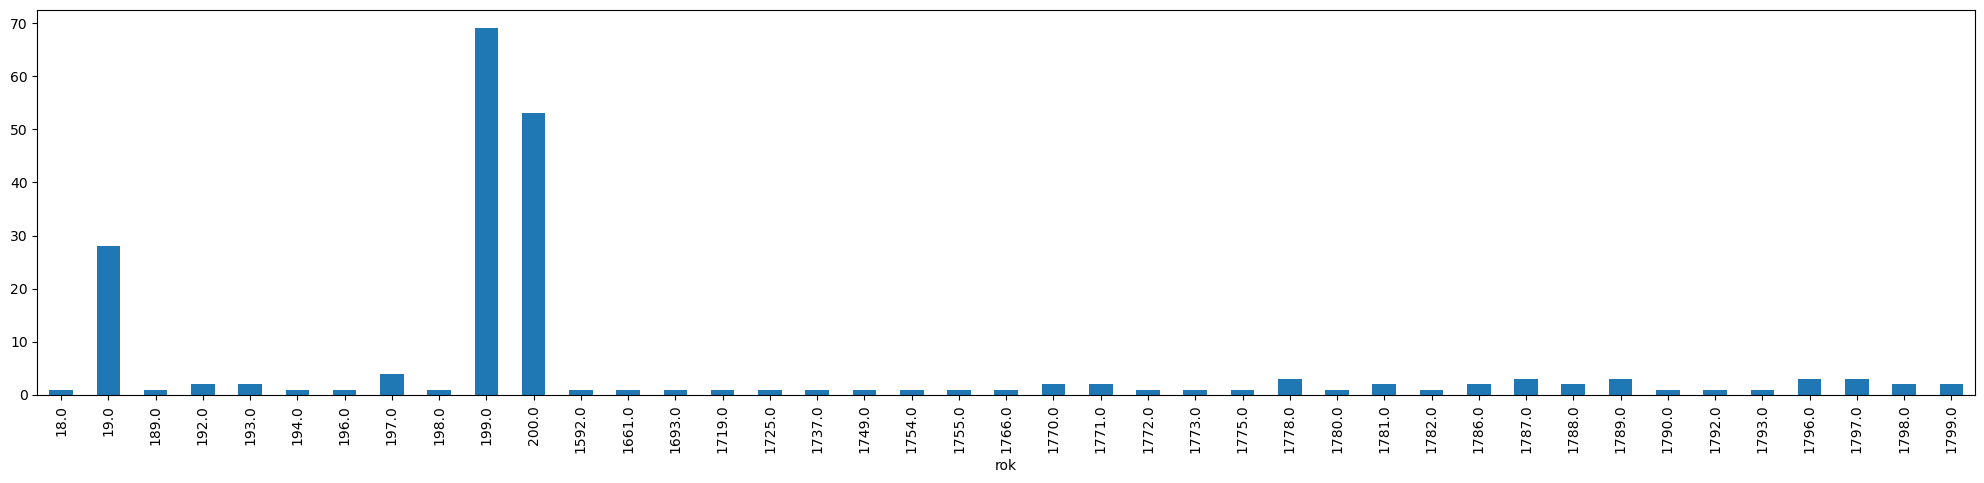

In [36]:
df[df['rok'] < 1800].groupby('rok').size().plot.bar(figsize=(25,5))

<Axes: xlabel='rok'>

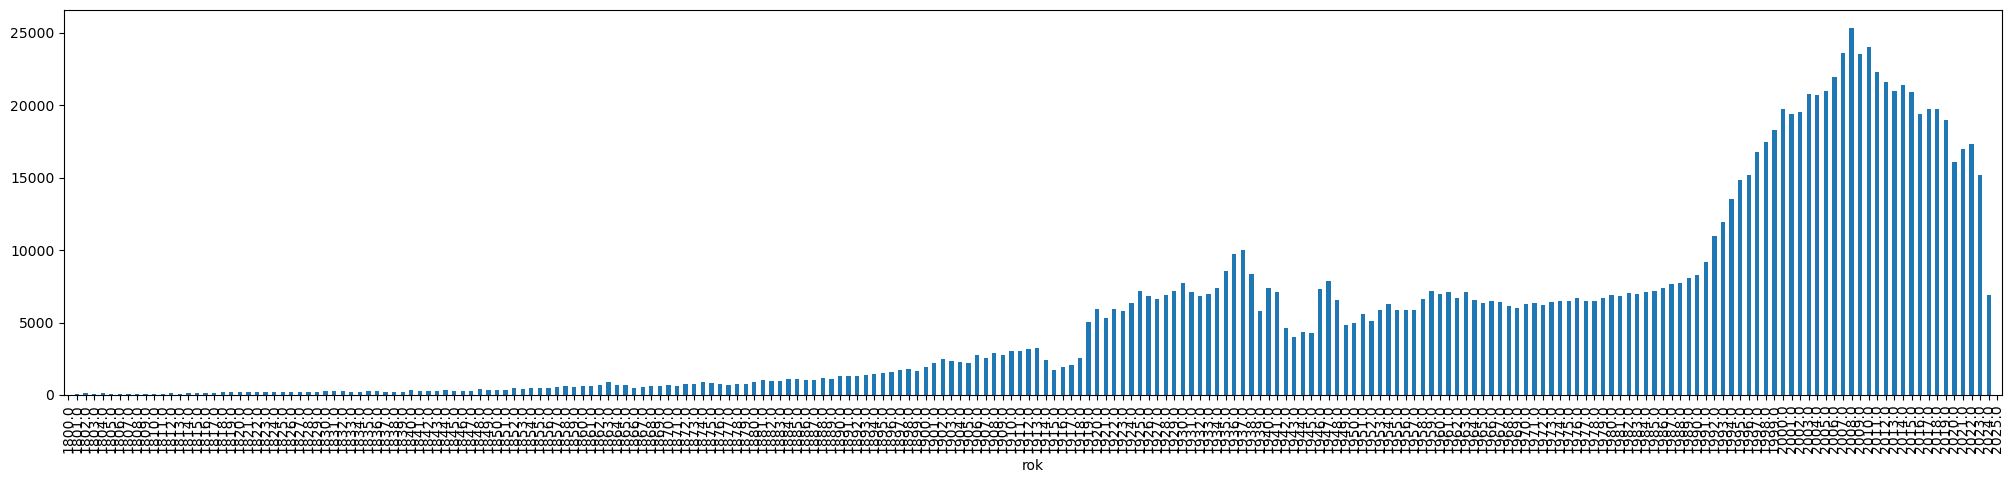

In [40]:
df[df['rok'] >= 1800].groupby('rok').size().plot.bar(figsize=(25,5))

In [63]:
proza = pd.read_parquet(os.path.join('data','cnb_ceska_proza.parquet'))

In [65]:
proza.sample(3)

,rok,titul,autorstvo,autorstvo_kod
001,,,,
nkc20051627144,2005.0,Oblast stínu,Exner Milan,jn20000400644
nkc20081828515,2008.0,Dan Young.,Velinský Jaroslav,jn99240001258
nkc20172927575,2017.0,Lido di Dante,Borkovec Petr,jn19990218007


<Axes: xlabel='rok'>

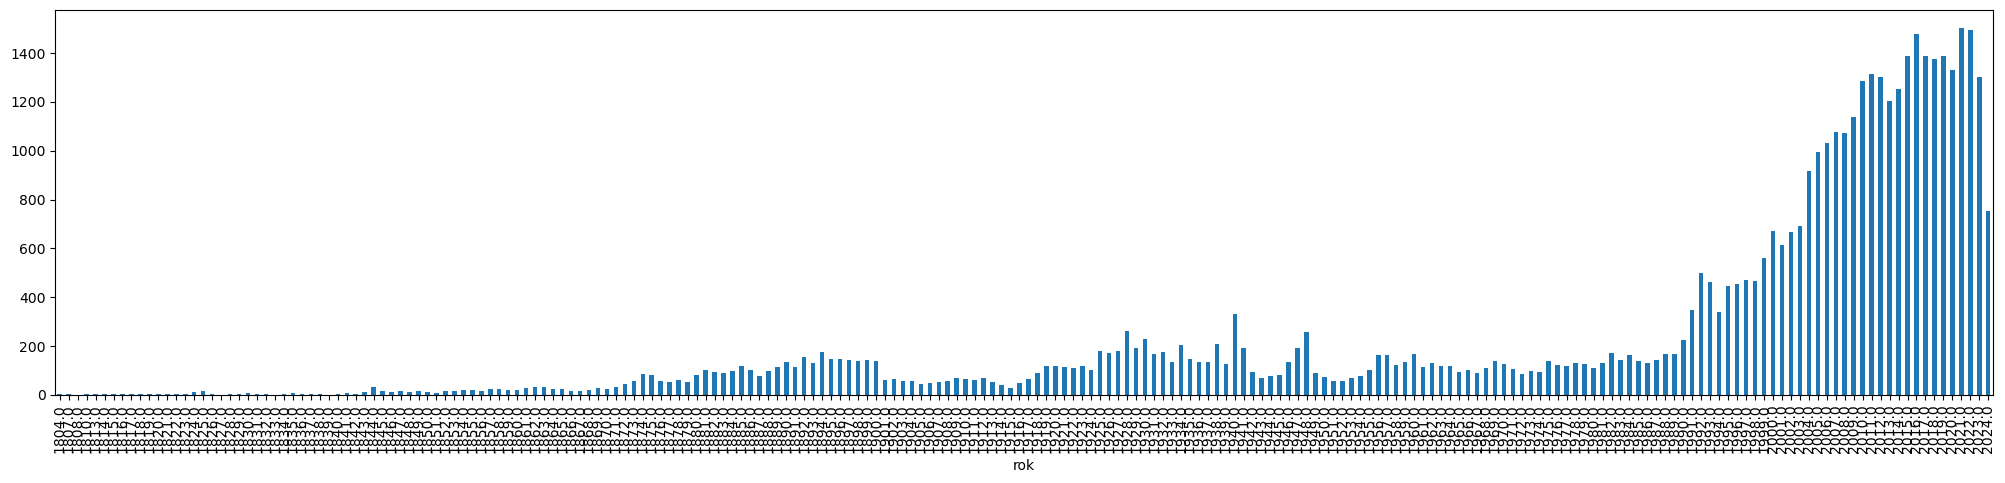

In [67]:
proza.groupby('rok').size().plot.bar(figsize=(25,5))

In [69]:
poezie = pd.read_parquet(os.path.join('data','cnb_ceska_poezie.parquet'))

<Axes: xlabel='rok'>

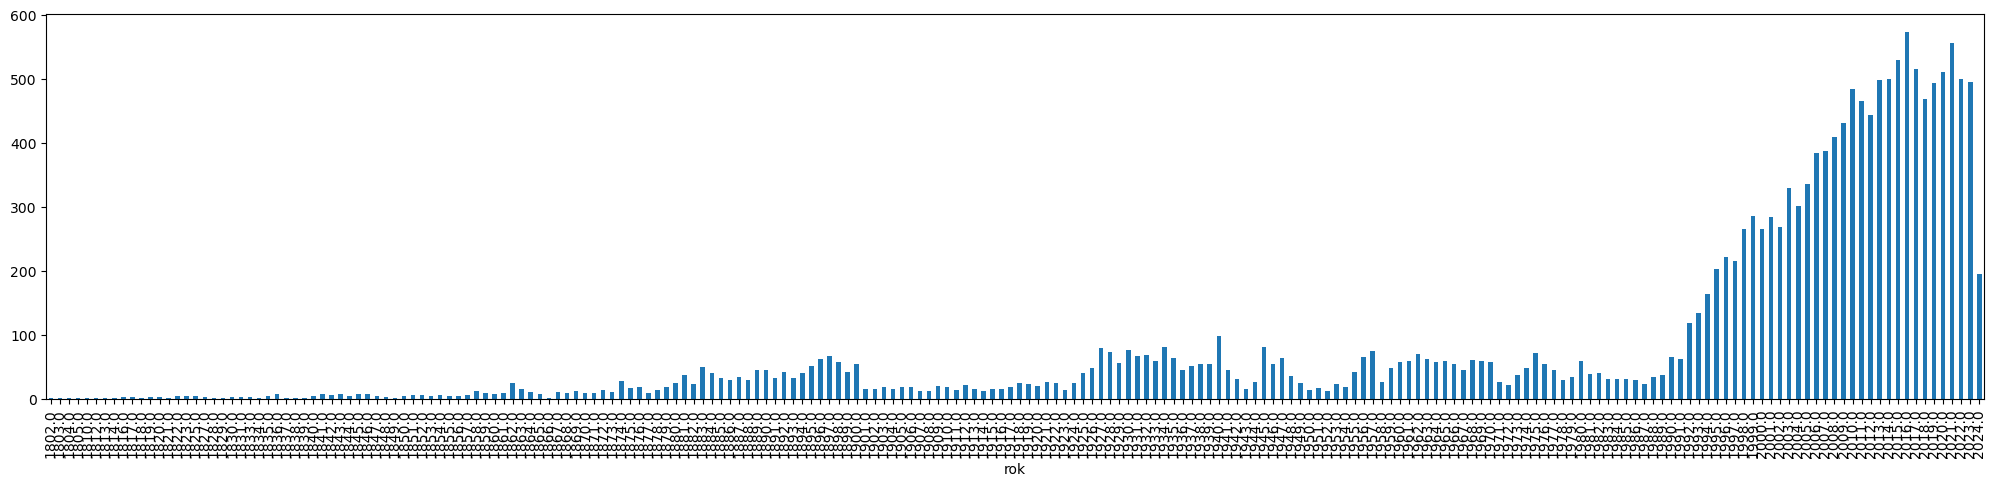

In [71]:
poezie.groupby('rok').size().plot.bar(figsize=(25,5))